In [55]:
# run `pip install medmnist` in terminal
import medmnist
from medmnist import BloodMNIST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# downloads bloodmnist.npz file 
# at /Users/username/.medmnist/bloodmnist.npz
# 28 pixel resolution
# image dimension is 28x28x3
# change to download=False to avoid multiple downloading
train_df = BloodMNIST(split="train", download=False)
val_df = BloodMNIST(split="val", download=False)
test_df = BloodMNIST(split="test", download=False)

In [3]:
# train metadata
train_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /Users/diana/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Licens

In [4]:
# validation metadata
val_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 1712
    Root location: /Users/diana/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: 

In [5]:
# test metadata
test_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 3421
    Root location: /Users/diana/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License:

In [6]:
# copy downloaded bloodmnist.npz file to current working directory
# check your current directory to copy the file
# import os
# print(os.getcwd())
# cp -r /Users/username/.medmnist/bloodmnist.npz .
# load in file and check names of attributes
data = np.load("bloodmnist.npz")
data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [7]:
# mapping label numbers to cell types as in metadata
label_dict = {"0": "basophil", "1": "eosinophil", "2": "erythroblast", \
              "3": "immature granulocytes", "4": "lymphocyte", \
              "5": "monocyte", "6": "neutrophil", "7": "platelet"}

In [8]:
# extracting images and labels
# train set
train_images = data["train_images"]
train_labels = data["train_labels"].flatten()

# validation_set
val_images = data["val_images"]
val_labels = data["val_labels"].flatten()

# test_set
test_images = data["test_images"]
test_labels = data["test_labels"].flatten()

In [9]:
train_distribution = pd.DataFrame()
cell_labels = []
cell_counts = []
cell_props = []
for i in np.arange(8):
    cell_labels.append(label_dict[str(i)])

    count = np.sum(train_labels == i)
    cell_counts.append(count)

    prop = np.round(count/len(train_labels), 2)
    cell_props.append(prop)

train_distribution["cell_label"] = cell_labels
train_distribution["cell_counts"] = cell_counts
train_distribution["cell_props"] = cell_props
train_distribution

,cell_label,cell_counts,cell_props
0,basophil,852,0.07
1,eosinophil,2181,0.18
2,erythroblast,1085,0.09
3,immature granulocytes,2026,0.17
4,lymphocyte,849,0.07
5,monocyte,993,0.08
6,neutrophil,2330,0.19
7,platelet,1643,0.14


In [10]:
val_distribution = pd.DataFrame()
cell_labels = []
cell_counts = []
cell_props = []
for i in np.arange(8):
    cell_labels.append(label_dict[str(i)])

    count = np.sum(val_labels == i)
    cell_counts.append(count)

    prop = np.round(count/len(val_labels), 2)
    cell_props.append(prop)

val_distribution["cell_label"] = cell_labels
val_distribution["cell_counts"] = cell_counts
val_distribution["cell_props"] = cell_props
val_distribution

,cell_label,cell_counts,cell_props
0,basophil,122,0.07
1,eosinophil,312,0.18
2,erythroblast,155,0.09
3,immature granulocytes,290,0.17
4,lymphocyte,122,0.07
5,monocyte,143,0.08
6,neutrophil,333,0.19
7,platelet,235,0.14


In [11]:
test_distribution = pd.DataFrame()
cell_labels = []
cell_counts = []
cell_props = []
for i in np.arange(8):
    cell_labels.append(label_dict[str(i)])

    count = np.sum(test_labels == i)
    cell_counts.append(count)

    prop = np.round(count/len(test_labels), 2)
    cell_props.append(prop)

test_distribution["cell_label"] = cell_labels
test_distribution["cell_counts"] = cell_counts
test_distribution["cell_props"] = cell_props
test_distribution

,cell_label,cell_counts,cell_props
0,basophil,244,0.07
1,eosinophil,624,0.18
2,erythroblast,311,0.09
3,immature granulocytes,579,0.17
4,lymphocyte,243,0.07
5,monocyte,284,0.08
6,neutrophil,666,0.19
7,platelet,470,0.14


In [12]:
# concatenanting all images and labels 
cat_images = np.concatenate([train_images, val_images, test_images])
cat_labels = np.concatenate([train_labels, val_labels, test_labels])

In [13]:
# creating a dictionary as label:[images]
class_dict = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels, cat_images):
    class_dict[i].append(j)

In [14]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict = {k:[] for k in np.arange(8)}
for i in class_dict:
    class_images = class_dict[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict[i] = class_avg

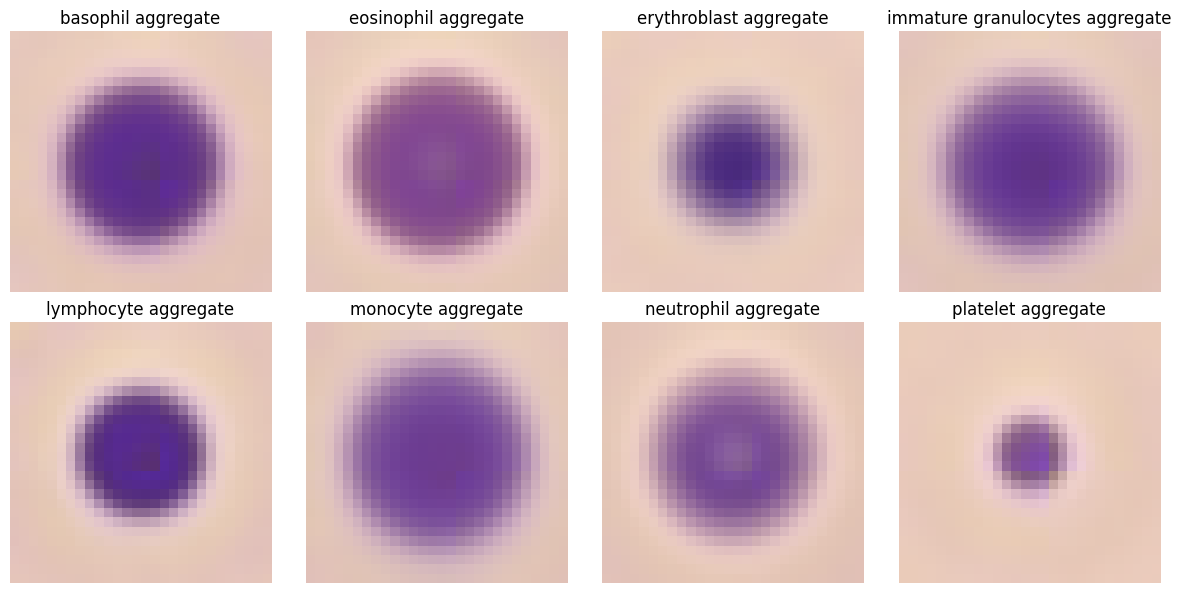

In [15]:
# plotting aggregated images for each cell class
# for 28x28x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

In [16]:
# downloads bloodmnist_224.npz file 
# at /Users/username/.medmnist/bloodmnist_224.npz
# 224 pixel resolution
# image dimension is 224x224x3
train_df_224 = BloodMNIST(split="train", download=False, size=224)
val_df_224 = BloodMNIST(split="val", download=False, size=224)
test_df_224 = BloodMNIST(split="test", download=False, size=224)

In [17]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist_224.npz .
# load in file and check names of attributes
data_224 = np.load("bloodmnist_224.npz")
data_224.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [18]:
# extracting images and labels
# train set
train_images_224 = data_224["train_images"]
train_labels_224 = data_224["train_labels"].flatten()

# validation_set
val_images_224 = data_224["val_images"]
val_labels_224 = data_224["val_labels"].flatten()

# test_set
test_images_224 = data_224["test_images"]
test_labels_224 = data_224["test_labels"].flatten()

In [19]:
# concatenanting all images and labels 
cat_images_224 = np.concatenate([train_images_224, val_images_224, test_images_224])
cat_labels_224 = np.concatenate([train_labels_224, val_labels_224, test_labels_224])

In [20]:
# creating a dictionary as label:[images]
class_dict_224 = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels_224, cat_images_224):
    class_dict_224[i].append(j)

In [21]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict_224 = {k:[] for k in np.arange(8)}
for i in class_dict_224:
    class_images = class_dict_224[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict_224[i] = class_avg

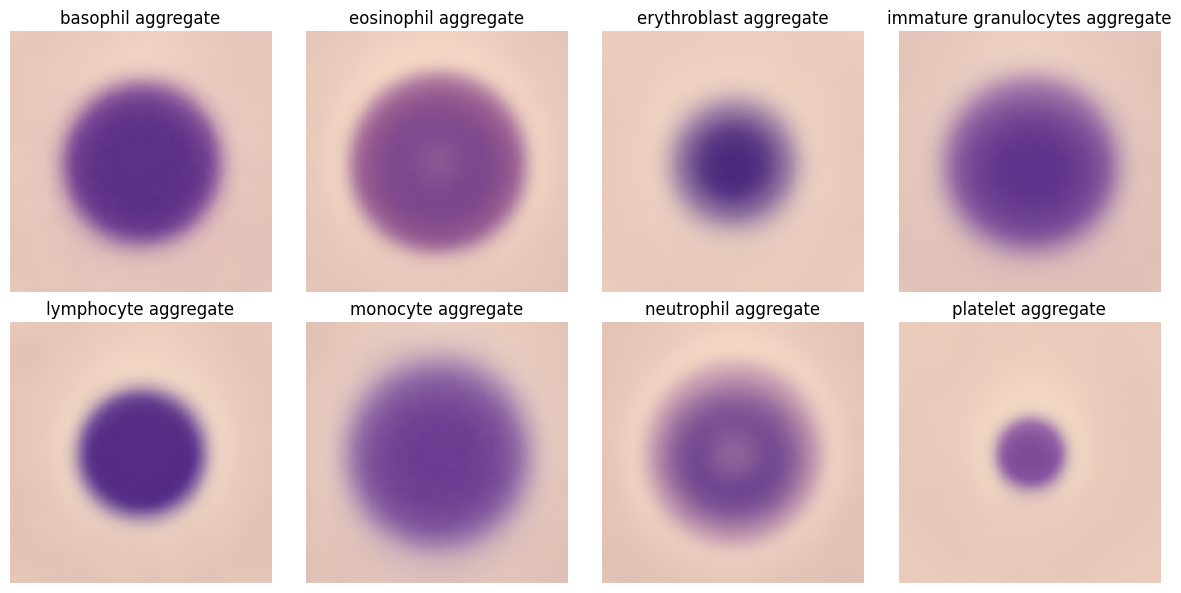

In [22]:
# plotting aggregated images for each cell class
# for 224x224x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict_224[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101, ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [24]:
print(train_labels_224.shape, val_labels_224.shape, test_labels_224.shape)

(11959,) (1712,) (3421,)


In [25]:
train_labels_cat_224 = to_categorical(train_labels_224, num_classes=8)  # shape (N,8)
val_labels_cat_224   = to_categorical(val_labels_224,   num_classes=8)
test_labels_cat_224  = to_categorical(test_labels_224,  num_classes=8)
print(train_labels_cat_224.shape, val_labels_cat_224.shape, test_labels_cat_224.shape)

(11959, 8) (1712, 8) (3421, 8)


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
#    preprocessing_function=lambda img: tf.image.resize(img, (28,28))
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
#    preprocessing_function=lambda img: tf.image.resize(img, (28,28))
)

batch_size = 16

In [27]:
train_generator_224 = train_datagen.flow(
    train_images_224, 
    train_labels_cat_224,   
    batch_size=batch_size
)
val_generator_224 = test_datagen.flow(
    val_images_224,
    val_labels_cat_224,
    batch_size=batch_size
)
test_generator_224 = test_datagen.flow(
    test_images_224,
    test_labels_cat_224,
    batch_size=batch_size,
    shuffle=False
)

In [28]:
base_101_224 = ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

x = base_101_224.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(8, activation="softmax")(x)

model_101_224 = Model(inputs=base_101_224.input, outputs=outputs)


In [29]:
#model.compile(
#    optimizer=tf.keras.optimizers.Adam(1e-4),
#    loss="sparse_categorical_crossentropy",
#    metrics=["accuracy", AUC(name="auc", multi_label=True, num_labels=8)]
#)
#
#model.fit(
#    train_generator,
#    epochs=6,
#    validation_data=val_generator
#)
model_101_224.compile(
    optimizer=Adam(1e-4), 
    # the learning rate should be further tuned
    # Adam is usually the first algorithm to try firther, but we can try other optimizers
    loss="categorical_crossentropy",       
    metrics=[
        "accuracy",
        AUC(name="auc", multi_label=True, num_labels=8)
    ]
)
model_101_224.fit(
    train_generator_224,
    epochs=10,
    validation_data=val_generator_224
)

Epoch 1/10
748/748 [==============================] - 1386s 2s/step - loss: 0.1955 - accuracy: 0.9340 - auc: 0.9949 - val_loss: 3.5019 - val_accuracy: 0.3417 - val_auc: 0.7460
Epoch 2/10
748/748 [==============================] - 1372s 2s/step - loss: 0.0904 - accuracy: 0.9717 - auc: 0.9982 - val_loss: 0.0738 - val_accuracy: 0.9784 - val_auc: 0.9990
Epoch 3/10
748/748 [==============================] - 1383s 2s/step - loss: 0.0593 - accuracy: 0.9807 - auc: 0.9991 - val_loss: 0.0482 - val_accuracy: 0.9831 - val_auc: 0.9992
Epoch 4/10
748/748 [==============================] - 1366s 2s/step - loss: 0.0502 - accuracy: 0.9829 - auc: 0.9994 - val_loss: 0.1963 - val_accuracy: 0.9544 - val_auc: 0.9961
Epoch 5/10
748/748 [==============================] - 1358s 2s/step - loss: 0.0478 - accuracy: 0.9832 - auc: 0.9994 - val_loss: 0.0433 - val_accuracy: 0.9866 - val_auc: 0.9998
Epoch 6/10
748/748 [==============================] - 1376s 2s/step - loss: 0.0426 - accuracy: 0.9855 - auc: 0.9993 - va

In [63]:
test_loss_101_224, test_acc_101_224, test_auc_101_224 = model_101_224.evaluate(test_generator_224)
print(f"ResNet101 test accuracy for 224 pixels: {test_acc_101_224:.4f}")
print(f"ResNet101 test AUC for 224 pixels:      {test_auc_101_224:.4f}")

214/214 [==============================] - 93s 437ms/step - loss: 0.0464 - accuracy: 0.9880 - auc: 0.9989
ResNet101 test accuracy for 224 pixels: 0.9880
ResNet101 test AUC for 224 pixels:      0.9989


In [59]:
y_prob_101_224 = model_101_224.predict(test_generator_224)
y_pred_101_224 = np.argmax(y_prob_101_224, axis=1)

y_true_224 = test_labels_224

class_names = [label_dict[str(i)] for i in range(8)]
print(classification_report(y_true_224, y_pred_101_224, target_names=class_names))

214/214 [==============================] - 95s 437ms/step
                       precision    recall  f1-score   support

             basophil       1.00      0.98      0.99       244
           eosinophil       1.00      1.00      1.00       624
         erythroblast       1.00      0.99      0.99       311
immature granulocytes       0.97      0.98      0.97       579
           lymphocyte       0.98      1.00      0.99       243
             monocyte       1.00      0.98      0.99       284
           neutrophil       0.97      0.98      0.98       666
             platelet       1.00      1.00      1.00       470

             accuracy                           0.99      3421
            macro avg       0.99      0.99      0.99      3421
         weighted avg       0.99      0.99      0.99      3421



In [60]:
cm_101_224 = confusion_matrix(y_true_224, y_pred_101_224)
per_class_acc_101_224 = cm_101_224.diagonal() / cm_101_224.sum(axis=1)
for i, acc in enumerate(per_class_acc_101_224):
    print(f"{class_names[i]:<20s} accuracy: {acc:.4f}")

basophil             accuracy: 0.9795
eosinophil           accuracy: 1.0000
erythroblast         accuracy: 0.9904
immature granulocytes accuracy: 0.9758
lymphocyte           accuracy: 0.9959
monocyte             accuracy: 0.9789
neutrophil           accuracy: 0.9820
platelet             accuracy: 1.0000


In [31]:
base_50_224 = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

x = base_50_224.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(8, activation="softmax")(x)

model_50_224 = Model(inputs=base_50_224.input, outputs=outputs)

In [32]:
model_50_224.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",       
    metrics=[
        "accuracy",
        AUC(name="auc", multi_label=True, num_labels=8)
    ]
)
model_50_224.fit(
    train_generator_224,
    epochs=10,
    validation_data=val_generator_224
)

Epoch 1/10
748/748 [==============================] - 748s 997ms/step - loss: 0.1976 - accuracy: 0.9367 - auc: 0.9952 - val_loss: 2.4636 - val_accuracy: 0.4328 - val_auc: 0.8099
Epoch 2/10
748/748 [==============================] - 750s 1s/step - loss: 0.0866 - accuracy: 0.9704 - auc: 0.9983 - val_loss: 0.0906 - val_accuracy: 0.9673 - val_auc: 0.9988
Epoch 3/10
748/748 [==============================] - 767s 1s/step - loss: 0.0634 - accuracy: 0.9804 - auc: 0.9987 - val_loss: 0.1256 - val_accuracy: 0.9597 - val_auc: 0.9981
Epoch 4/10
748/748 [==============================] - 773s 1s/step - loss: 0.0575 - accuracy: 0.9798 - auc: 0.9993 - val_loss: 0.0664 - val_accuracy: 0.9761 - val_auc: 0.9995
Epoch 5/10
748/748 [==============================] - 764s 1s/step - loss: 0.0487 - accuracy: 0.9834 - auc: 0.9994 - val_loss: 0.1888 - val_accuracy: 0.9363 - val_auc: 0.9952
Epoch 6/10
748/748 [==============================] - 756s 1s/step - loss: 0.0405 - accuracy: 0.9847 - auc: 0.9995 - val_l

In [33]:
test_loss_50_224, test_acc_50_224, test_auc_50_224 = model_50_224.evaluate(test_generator_224)
print(f"ResNet50 test accuracy for 224 pixels: {test_acc_50_224:.4f}")
print(f"ResNet50 test AUC for 224 pixels:      {test_auc_50_224:.4f}")

214/214 [==============================] - 53s 249ms/step - loss: 0.0567 - accuracy: 0.9857 - auc: 0.9985
ResNet50 test accuracy: 0.9857
ResNet50 test AUC:      0.9985


In [61]:
y_prob_50_224 = model_50_224.predict(test_generator_224)
y_pred_50_224 = np.argmax(y_prob_50_224, axis=1)

y_true_224 = test_labels_224

class_names = [label_dict[str(i)] for i in range(8)]
print(classification_report(y_true_224, y_pred_50_224, target_names=class_names))

214/214 [==============================] - 52s 240ms/step
                       precision    recall  f1-score   support

             basophil       1.00      1.00      1.00       244
           eosinophil       1.00      1.00      1.00       624
         erythroblast       1.00      0.98      0.99       311
immature granulocytes       0.96      0.97      0.97       579
           lymphocyte       0.97      1.00      0.98       243
             monocyte       1.00      0.95      0.97       284
           neutrophil       0.97      0.98      0.98       666
             platelet       1.00      1.00      1.00       470

             accuracy                           0.99      3421
            macro avg       0.99      0.98      0.99      3421
         weighted avg       0.99      0.99      0.99      3421



In [62]:
cm_50_224 = confusion_matrix(y_true_224, y_pred_50_224)
per_class_acc_50_224 = cm_50_224.diagonal() / cm_50_224.sum(axis=1)
for i, acc in enumerate(per_class_acc_50_224):
    print(f"{class_names[i]:<20s} accuracy: {acc:.4f}")

basophil             accuracy: 0.9959
eosinophil           accuracy: 1.0000
erythroblast         accuracy: 0.9839
immature granulocytes accuracy: 0.9724
lymphocyte           accuracy: 0.9959
monocyte             accuracy: 0.9472
neutrophil           accuracy: 0.9835
platelet             accuracy: 1.0000


In [34]:
# downloads bloodmnist_64.npz file 
# at /Users/username/.medmnist/bloodmnist_64.npz
# 64 pixel resolution
# image dimension is 64x64x3
train_df_64 = BloodMNIST(split="train", download=False, size=64)
val_df_64 = BloodMNIST(split="val", download=False, size=64)
test_df_64 = BloodMNIST(split="test", download=False, size=64)

In [35]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist_64.npz .
# load in file and check names of attributes
data_64 = np.load("bloodmnist_64.npz")
data_64.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [36]:
# extracting images and labels
# train set
train_images_64 = data_64["train_images"]
train_labels_64 = data_64["train_labels"].flatten()

# validation_set
val_images_64 = data_64["val_images"]
val_labels_64 = data_64["val_labels"].flatten()

# test_set
test_images_64 = data_64["test_images"]
test_labels_64 = data_64["test_labels"].flatten()

In [37]:
# concatenanting all images and labels 
cat_images_64 = np.concatenate([train_images_64, val_images_64, test_images_64])
cat_labels_64 = np.concatenate([train_labels_64, val_labels_64, test_labels_64])

In [38]:
# creating a dictionary as label:[images]
class_dict_64 = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels_64, cat_images_64):
    class_dict_64[i].append(j)

In [39]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict_64 = {k:[] for k in np.arange(8)}
for i in class_dict_64:
    class_images = class_dict_64[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict_64[i] = class_avg

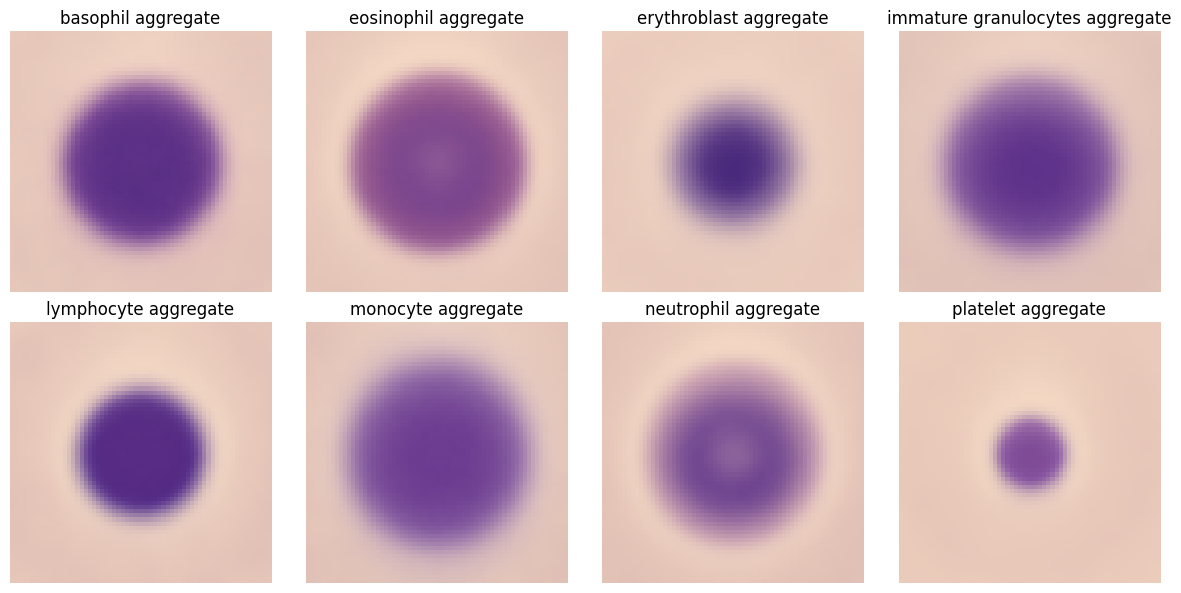

In [40]:
# plotting aggregated images for each cell class
# for 64x64x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict_64[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

In [41]:
print(train_labels_64.shape, val_labels_64.shape, test_labels_64.shape)

(11959,) (1712,) (3421,)


In [42]:
train_labels_cat_64 = to_categorical(train_labels_64, num_classes=8)  # shape (N,8)
val_labels_cat_64   = to_categorical(val_labels_64,   num_classes=8)
test_labels_cat_64  = to_categorical(test_labels_64,  num_classes=8)
print(train_labels_cat_64.shape, val_labels_cat_64.shape, test_labels_cat_64.shape)

(11959, 8) (1712, 8) (3421, 8)


In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
#    preprocessing_function=lambda img: tf.image.resize(img, (28,28))
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
#    preprocessing_function=lambda img: tf.image.resize(img, (28,28))
)

batch_size = 16

In [44]:
train_generator_64 = train_datagen.flow(
    train_images_64, 
    train_labels_cat_64,   
    batch_size=batch_size
)
val_generator_64 = test_datagen.flow(
    val_images_64,
    val_labels_cat_64,
    batch_size=batch_size
)
test_generator_64 = test_datagen.flow(
    test_images_64,
    test_labels_cat_64,
    batch_size=batch_size,
    shuffle=False
)

In [45]:
base_101_64 = ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3)
)

x = base_101_64.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(8, activation="softmax")(x)

model_101_64 = Model(inputs=base_101_64.input, outputs=outputs)

In [46]:
model_101_64.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",       
    metrics=[
        "accuracy",
        AUC(name="auc", multi_label=True, num_labels=8)
    ]
)
model_101_64.fit(
    train_generator_64,
    epochs=10,
    validation_data=val_generator_64
)

Epoch 1/10
748/748 [==============================] - 178s 233ms/step - loss: 0.4479 - accuracy: 0.8521 - auc: 0.9798 - val_loss: 5.5537 - val_accuracy: 0.2272 - val_auc: 0.6606
Epoch 2/10
748/748 [==============================] - 175s 234ms/step - loss: 0.1775 - accuracy: 0.9416 - auc: 0.9952 - val_loss: 0.1873 - val_accuracy: 0.9404 - val_auc: 0.9961
Epoch 3/10
748/748 [==============================] - 176s 236ms/step - loss: 0.1163 - accuracy: 0.9619 - auc: 0.9970 - val_loss: 0.1171 - val_accuracy: 0.9614 - val_auc: 0.9981
Epoch 4/10
748/748 [==============================] - 177s 237ms/step - loss: 0.0987 - accuracy: 0.9671 - auc: 0.9979 - val_loss: 0.2577 - val_accuracy: 0.9206 - val_auc: 0.9919
Epoch 5/10
748/748 [==============================] - 176s 235ms/step - loss: 0.0977 - accuracy: 0.9675 - auc: 0.9980 - val_loss: 0.1148 - val_accuracy: 0.9603 - val_auc: 0.9972
Epoch 6/10
748/748 [==============================] - 175s 234ms/step - loss: 0.0787 - accuracy: 0.9723 - auc:

In [47]:
test_loss_101_64, test_acc_101_64, test_auc_101_64 = model_101_64.evaluate(test_generator_64)
print(f"ResNet101 test accuracy for 64 pixels: {test_acc_101_64:.4f}")
print(f"ResNet101 test AUC for 64 pixels:      {test_auc_101_64:.4f}")

214/214 [==============================] - 13s 60ms/step - loss: 0.0934 - accuracy: 0.9693 - auc: 0.9978
ResNet101 test accuracy for 64 pixels: 0.9693
ResNet101 test AUC for 64 pixels:      0.9978


In [56]:
y_prob_101_64 = model_101_64.predict(test_generator_64)
y_pred_101_64 = np.argmax(y_prob_101_64, axis=1)

y_true_64 = test_labels_64

class_names = [label_dict[str(i)] for i in range(8)]
print(classification_report(y_true_64, y_pred_101_64, target_names=class_names))

214/214 [==============================] - 14s 62ms/step
                       precision    recall  f1-score   support

             basophil       0.98      0.98      0.98       244
           eosinophil       0.99      1.00      1.00       624
         erythroblast       0.98      0.99      0.99       311
immature granulocytes       0.89      0.98      0.93       579
           lymphocyte       1.00      0.93      0.96       243
             monocyte       0.96      0.85      0.90       284
           neutrophil       0.99      0.96      0.98       666
             platelet       1.00      1.00      1.00       470

             accuracy                           0.97      3421
            macro avg       0.97      0.96      0.97      3421
         weighted avg       0.97      0.97      0.97      3421



In [57]:
cm_101_64 = confusion_matrix(y_true_64, y_pred_101_64)
per_class_acc_101_64 = cm_101_64.diagonal() / cm_101_64.sum(axis=1)
for i, acc in enumerate(per_class_acc_101_64):
    print(f"{class_names[i]:<20s} accuracy: {acc:.4f}")

basophil             accuracy: 0.9836
eosinophil           accuracy: 1.0000
erythroblast         accuracy: 0.9904
immature granulocytes accuracy: 0.9827
lymphocyte           accuracy: 0.9259
monocyte             accuracy: 0.8451
neutrophil           accuracy: 0.9610
platelet             accuracy: 1.0000


In [48]:
base_50_64 = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3)
)

x = base_50_64.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(8, activation="softmax")(x)

model_50_64 = Model(inputs=base_50_64.input, outputs=outputs)

In [49]:
model_50_64.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",       
    metrics=[
        "accuracy",
        AUC(name="auc", multi_label=True, num_labels=8)
    ]
)
model_50_64.fit(
    train_generator_64,
    epochs=10,
    validation_data=val_generator_64
)

Epoch 1/10
748/748 [==============================] - 104s 137ms/step - loss: 0.4287 - accuracy: 0.8595 - auc: 0.9815 - val_loss: 3.2408 - val_accuracy: 0.1811 - val_auc: 0.6613
Epoch 2/10
748/748 [==============================] - 100s 134ms/step - loss: 0.1649 - accuracy: 0.9447 - auc: 0.9960 - val_loss: 0.2022 - val_accuracy: 0.9322 - val_auc: 0.9923
Epoch 3/10
748/748 [==============================] - 100s 134ms/step - loss: 0.1291 - accuracy: 0.9590 - auc: 0.9970 - val_loss: 0.1089 - val_accuracy: 0.9603 - val_auc: 0.9983
Epoch 4/10
748/748 [==============================] - 101s 135ms/step - loss: 0.0989 - accuracy: 0.9670 - auc: 0.9980 - val_loss: 0.1002 - val_accuracy: 0.9690 - val_auc: 0.9989
Epoch 5/10
748/748 [==============================] - 101s 135ms/step - loss: 0.0996 - accuracy: 0.9671 - auc: 0.9980 - val_loss: 0.1196 - val_accuracy: 0.9585 - val_auc: 0.9978
Epoch 6/10
748/748 [==============================] - 102s 136ms/step - loss: 0.0861 - accuracy: 0.9718 - auc:

In [50]:
test_loss_50_64, test_acc_50_64, test_auc_50_64 = model_50_64.evaluate(test_generator_64)
print(f"ResNet50 test accuracy for 64 pixels: {test_acc_50_64:.4f}")
print(f"ResNet50 test AUC for 64 pxiels:      {test_auc_50_64:.4f}")

214/214 [==============================] - 7s 31ms/step - loss: 0.1145 - accuracy: 0.9676 - auc: 0.9956
ResNet50 test accuracy for 64 pixels: 0.9676
ResNet50 test AUC for 64 pxiels:      0.9956


In [52]:
y_prob_50_64 = model_50_64.predict(test_generator_64)
y_pred_50_64 = np.argmax(y_prob_50_64, axis=1)

y_true_64 = test_labels_64

class_names = [label_dict[str(i)] for i in range(8)]
print(classification_report(y_true_64, y_pred_50_64, target_names=class_names))

214/214 [==============================] - 7s 32ms/step
                       precision    recall  f1-score   support

             basophil       0.98      0.98      0.98       244
           eosinophil       1.00      1.00      1.00       624
         erythroblast       0.98      0.97      0.98       311
immature granulocytes       0.90      0.96      0.92       579
           lymphocyte       0.94      0.98      0.96       243
             monocyte       1.00      0.81      0.89       284
           neutrophil       0.97      0.98      0.98       666
             platelet       1.00      1.00      1.00       470

             accuracy                           0.97      3421
            macro avg       0.97      0.96      0.96      3421
         weighted avg       0.97      0.97      0.97      3421



In [53]:
cm_50_64 = confusion_matrix(y_true_64, y_pred_50_64)
per_class_acc_50_64 = cm_50_64.diagonal() / cm_50_64.sum(axis=1)
for i, acc in enumerate(per_class_acc_50_64):
    print(f"{class_names[i]:<20s} accuracy: {acc:.4f}")

basophil             accuracy: 0.9836
eosinophil           accuracy: 1.0000
erythroblast         accuracy: 0.9743
immature granulocytes accuracy: 0.9551
lymphocyte           accuracy: 0.9835
monocyte             accuracy: 0.8063
neutrophil           accuracy: 0.9790
platelet             accuracy: 1.0000


# plot the loss vs. epoch function
# change the step size by change the batch size = 32

# Next step:
# precision recall f1 score 
# check accuracy by class
# investigate performance by the class
# try different drop_out rate
# try on other size of the picture.
# time magic function

In [67]:
from tensorflow.keras.callbacks import History as HistoryClass

ip = get_ipython()
outs = ip.user_ns["Out"]

history_cells = [num for num, obj in outs.items()
                 if isinstance(obj, HistoryClass)]
print("Found History outputs in cells:", history_cells)

Found History outputs in cells: [29, 32, 46, 49]


In [68]:
history1 = outs[history_cells[0]]
history2 = outs[history_cells[1]]
history3 = outs[history_cells[2]]
history4 = outs[history_cells[3]]

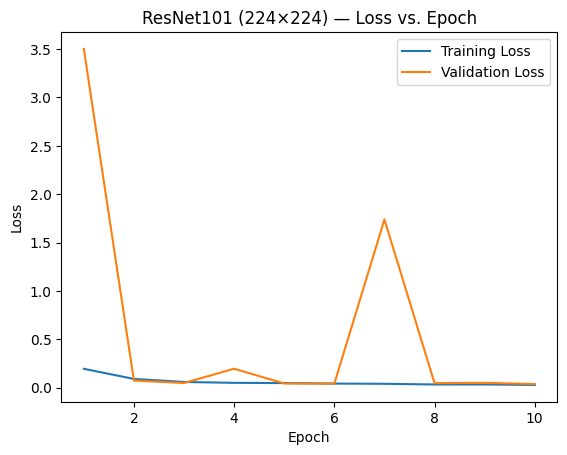

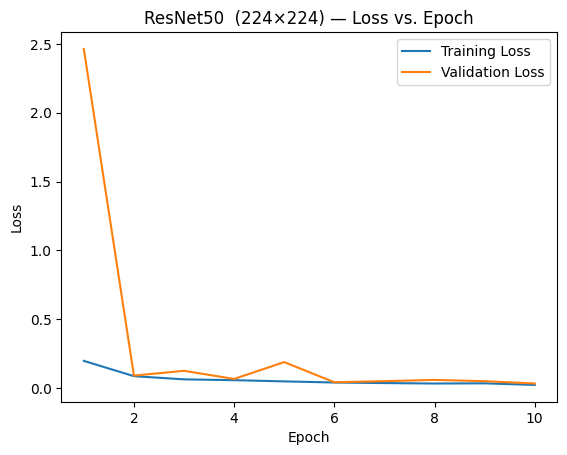

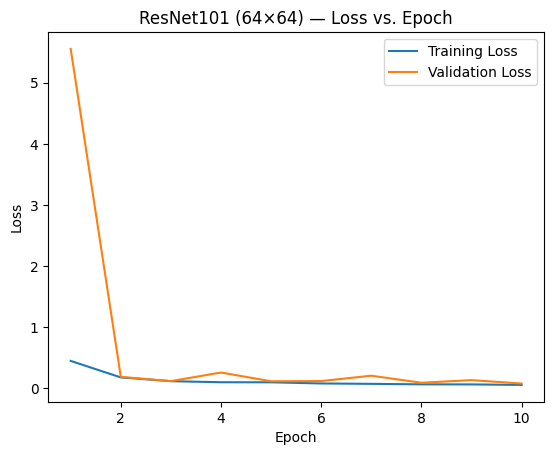

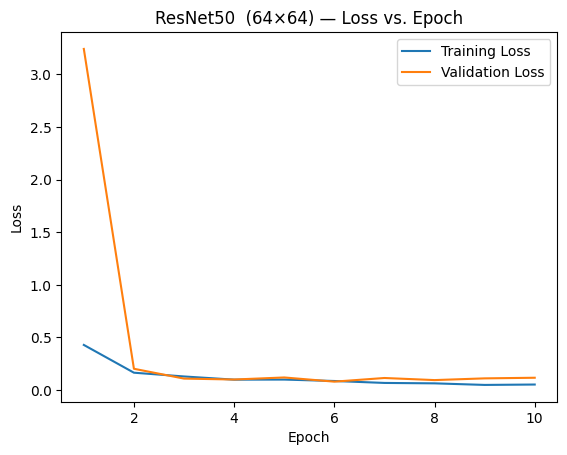

In [72]:
import matplotlib.pyplot as plt

histories = [history1, history2, history3, history4]
model_names = [
    'ResNet101 (224×224)', 
    'ResNet50  (224×224)',
    'ResNet101 (64×64)', 
    'ResNet50  (64×64)'
]

for name, hist in zip(model_names, histories):
    epochs = range(1, len(hist.history['loss']) + 1)
    plt.figure()
    plt.plot(epochs, hist.history['loss'],    label='Training Loss')
    plt.plot(epochs, hist.history['val_loss'],label='Validation Loss')
    plt.title(f'{name} — Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()